<a href="https://colab.research.google.com/github/StanleyNyadzayo/eee408labs/blob/main/lab11_WordClouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

# Prerequisites

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("christopheiv/winemagdata130k")

import warnings
warnings.filterwarnings("ignore")
# Load in the dataframe
df = pd.read_csv(f"{dataset_path}/winemag-data-130k-v2.csv", index_col=0)
# Looking at first 5 rows of the dataset
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using Colab cache for faster access to the 'winemagdata130k' dataset.


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [29]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                     ", ".join(df.country.unique()[0:5])))

There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [30]:
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [31]:
# Group by country
country = df.groupby("country")

# summary Statistic of all countries

country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

In [32]:
country[['points', 'price']].mean().sort_values(by="points", ascending=False)

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598
Hungary,89.191781,40.648276
China,89.000000,18.000000
France,88.845109,41.139120
Luxembourg,88.666667,23.333333


Plot the data

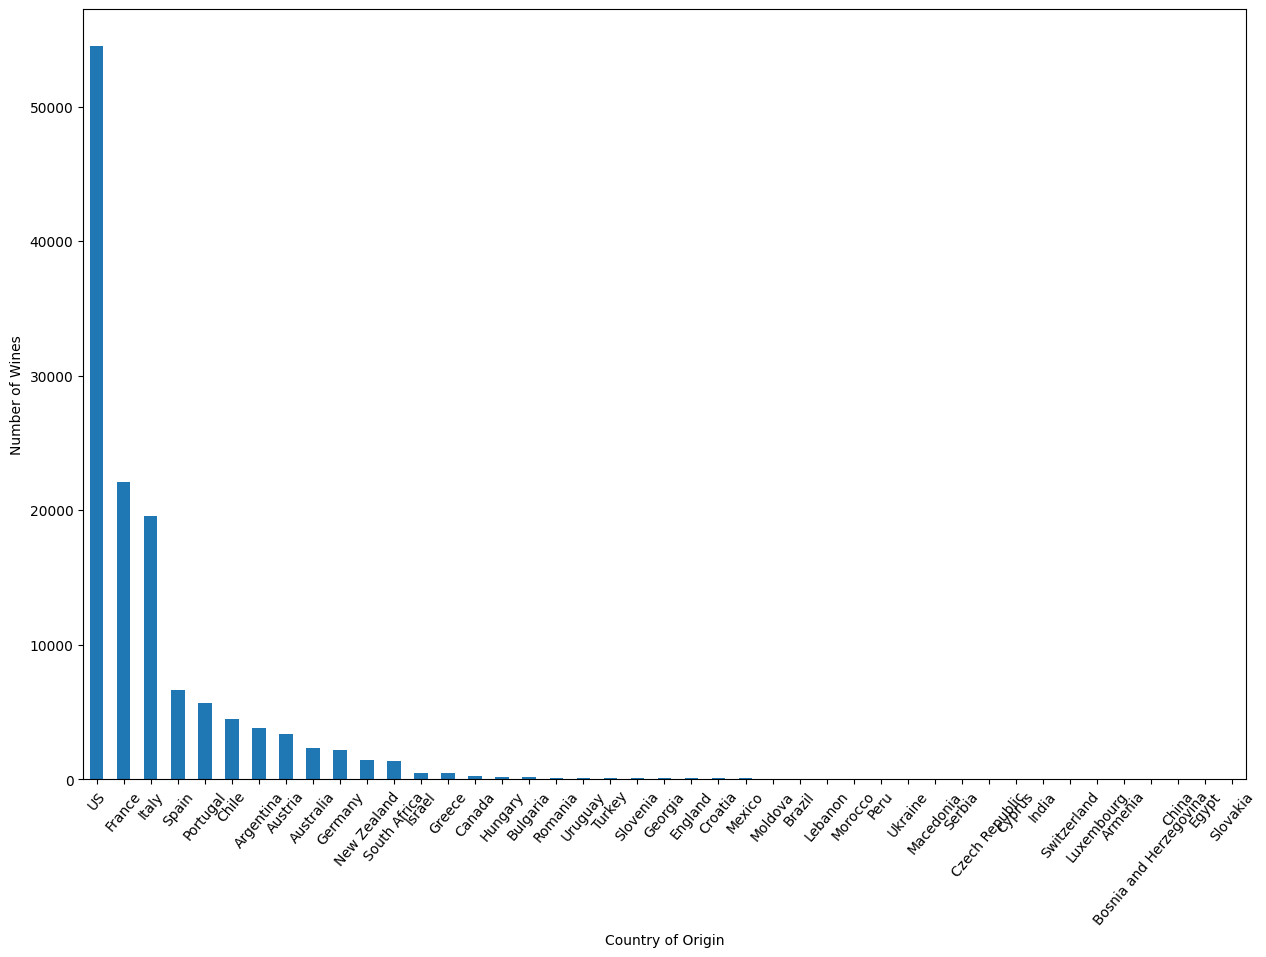

In [33]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

Examine the data

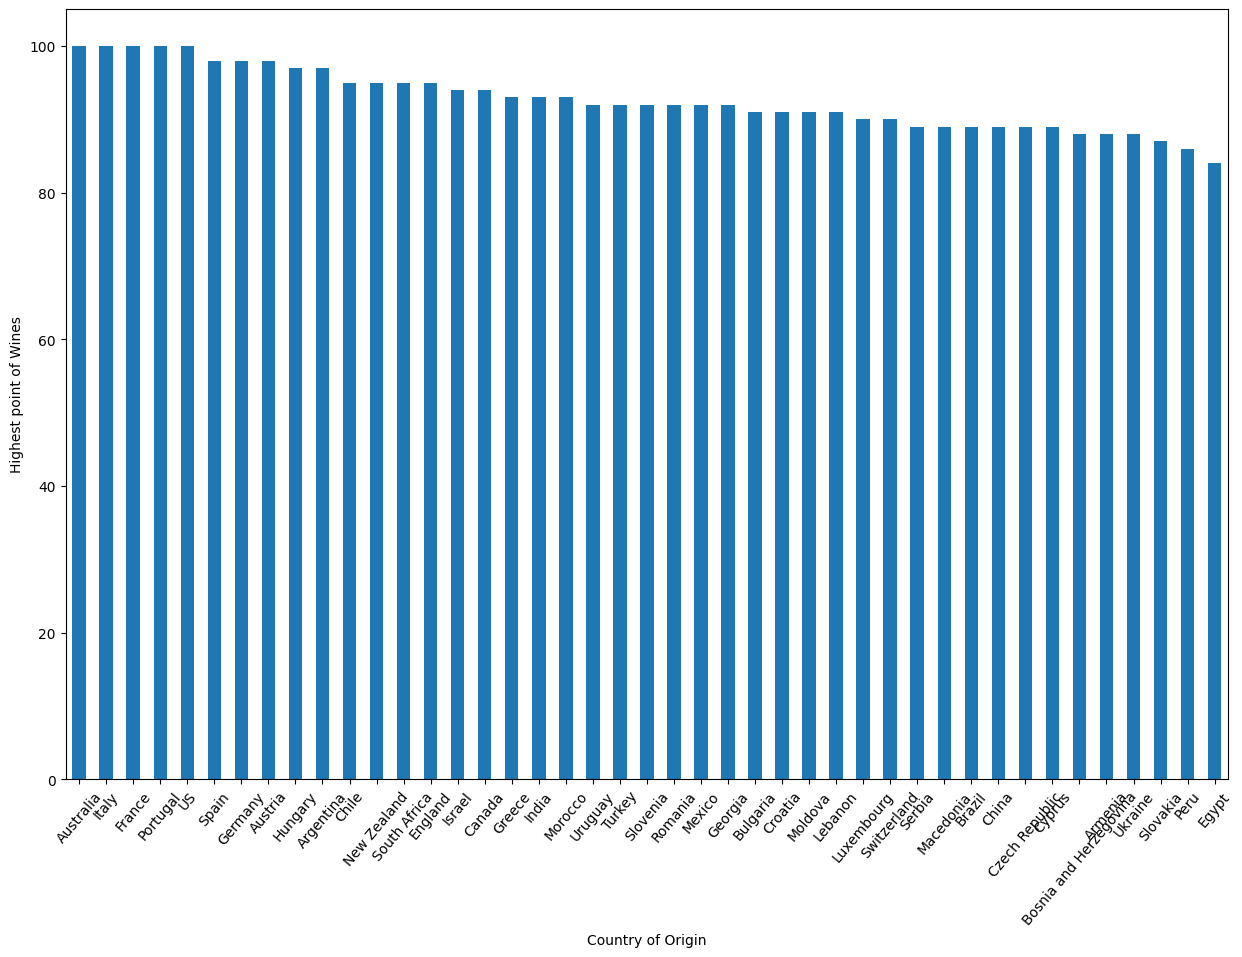

In [34]:
plt.figure(figsize=(15,10))
country["points"].max().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

Word Cloud

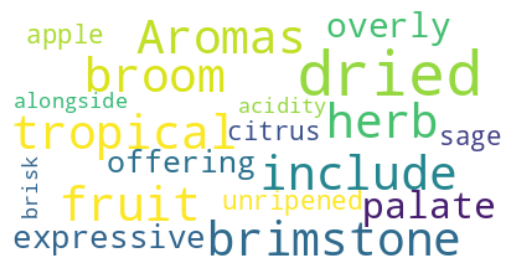

In [38]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Save the generated image
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Save the generated image to Google Drive
wordcloud.to_file("/content/drive/MyDrive/first_review.png")